## Background / Motivation

Throughout the STAT 303-2 class, we explored several modelling questions related to big-picture topics such as housing and bank finance. However, for our final project, we were interested in looking at how regression analysis could apply to questions that come up in our daily lives and conversations. For example, what do you think is going to happen next in your favorite book? 

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. Interpret the problem as inference and/or prediction.

The objective was prediction. We created a model to see if we could accurately predict whether Game of Thrones characters were dead or alive by the end of fifth book. The predictions were either 1 if they survived, or 0 if they died. 

## Data sources

We are using character-predictions.csv from the following Game of Thrones' dataset on Kaggle. The dataframe contains 1946 observations, but after filtering out NaN values for the columns we used as predictors, there were 493 characters with no missing data. The outcome we tried to predict was the column, isAlive. The predictors we used to do so were house, culture, male, and isNoble.

https://www.kaggle.com/datasets/mylesoneill/game-of-thrones?select=battles.csv

## Stakeholders

For the past decade, Game of Thrones readers have been waiting for the next installment in the series to be published. The most recent book ended with several cliffhangers, so fans have been left speculating what will happen next. A model with insight into what makes a person in the GOT universe more likely to die would be interesting to readers concerned about their favorite characters. With the presence of fandom communities online, especially for blockbusters such as Game of Thrones, there would be a strong appetite for content delving into the world. Although a regression model about the series would not be the same as George R. R. Martin's next novel, a nerdy analysis about the books could help tide fans over until the release date finally arrives. 

Also George R. R. Martin can use this model to see which characters are more likely to die and make changes to the story accordingly. If he knows that a character is more likely to die, he can make changes to the story to make sure that character survives, and vice versa. This would be beneficial to the author because he would be able to keep his readers on the edge of their seats, and keep them interested in the story.

## Data quality check / cleaning / preparation

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

In [22]:
import pandas as pd
characters = pd.read_csv("data/character-predictions_pose.csv")
display(characters.describe())

,S.No,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
characters.isnull().sum()

S.No                    0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [27]:
characters.house.value_counts().head()

Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
House Lannister     49
Name: house, dtype: int64

In [28]:
len(characters.house.unique())

348

In [29]:
characters.culture.value_counts().head()

Northmen     124
Ironborn     112
Free Folk     51
Valyrian      43
Braavosi      42
Name: culture, dtype: int64

In [30]:
len(characters.culture.unique())

65

Based on these distributions, we kept selected columns that we felt would be relevant to analysis and deleted observations with any missing values for any of the selected variables. This left us with 493 observations. Since there were many different values for each house and culture, binning each house and culture by survival rates would increase their predictive ability. Also for cultures, there were many names that corresponded to the same culture, so we combined those. Then, we found survival rates per culture and binned them accordingly, similarly to how houses were binned. 

## Exploratory data analysis -- not answered

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

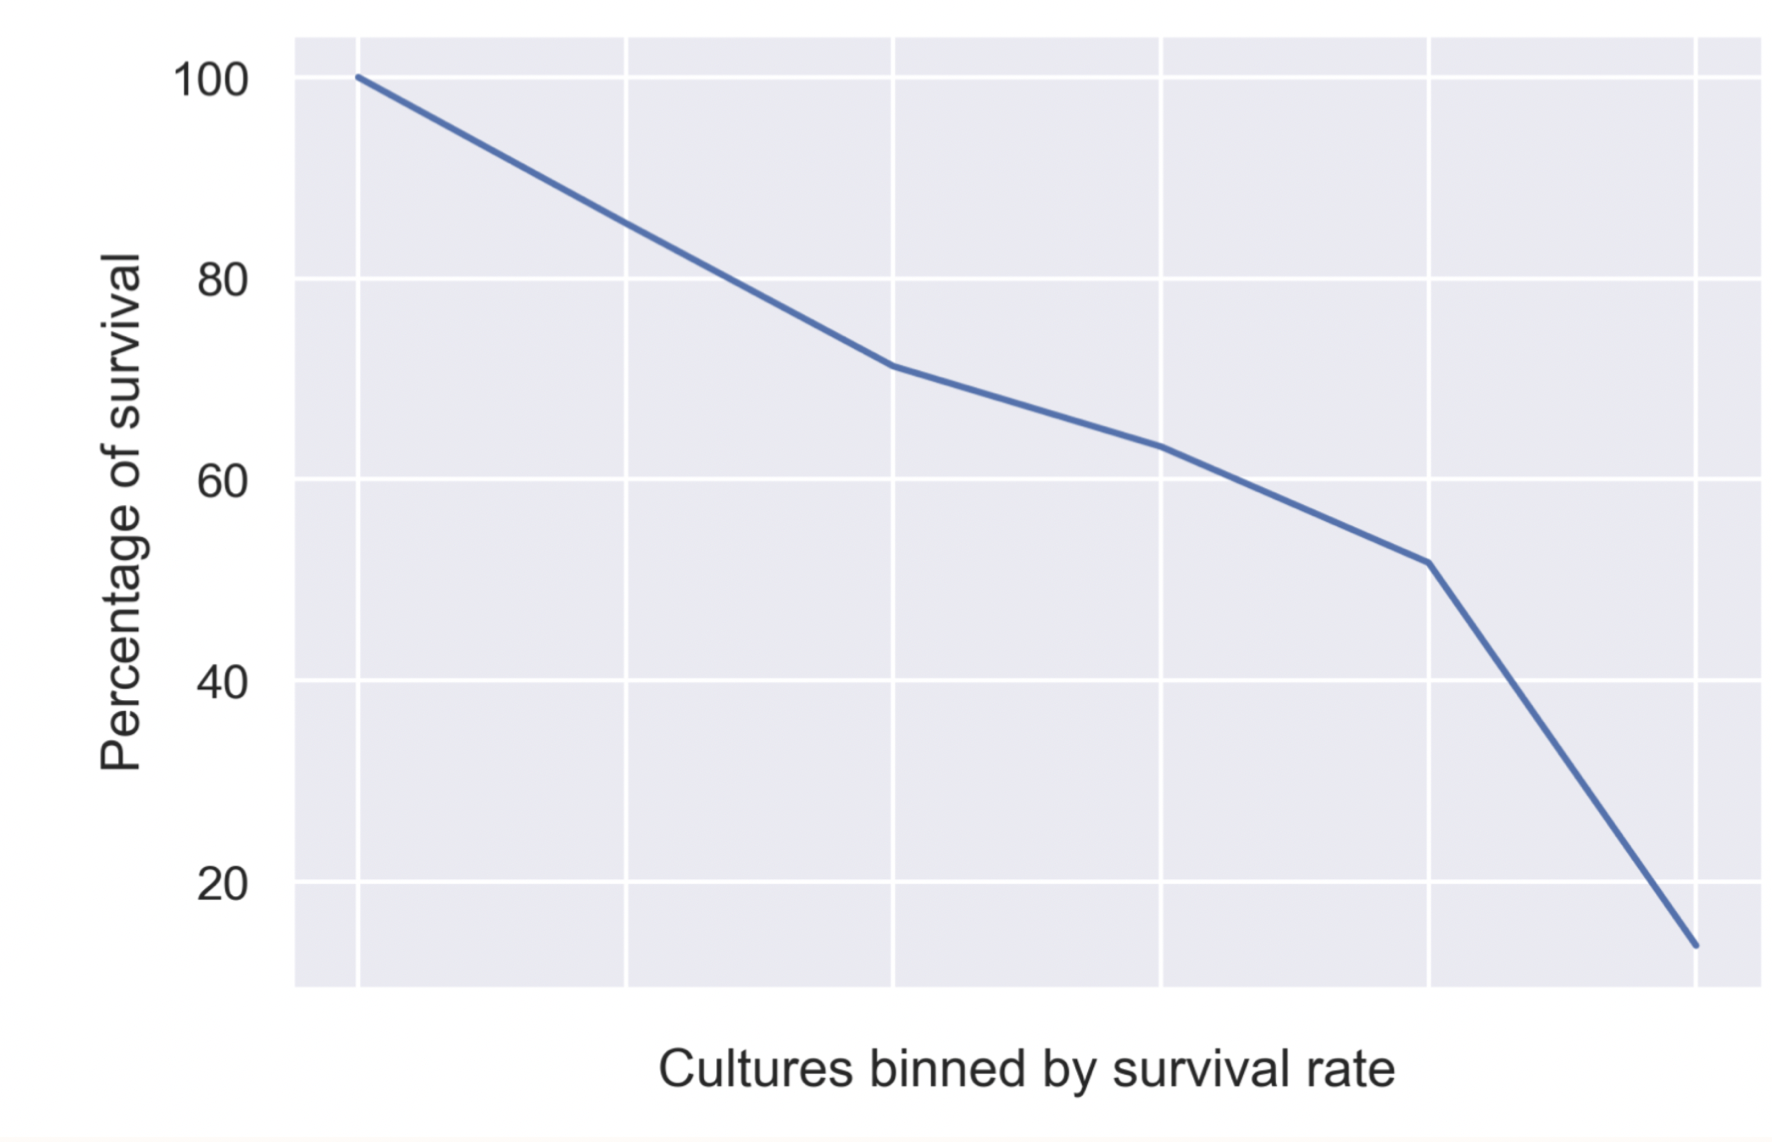

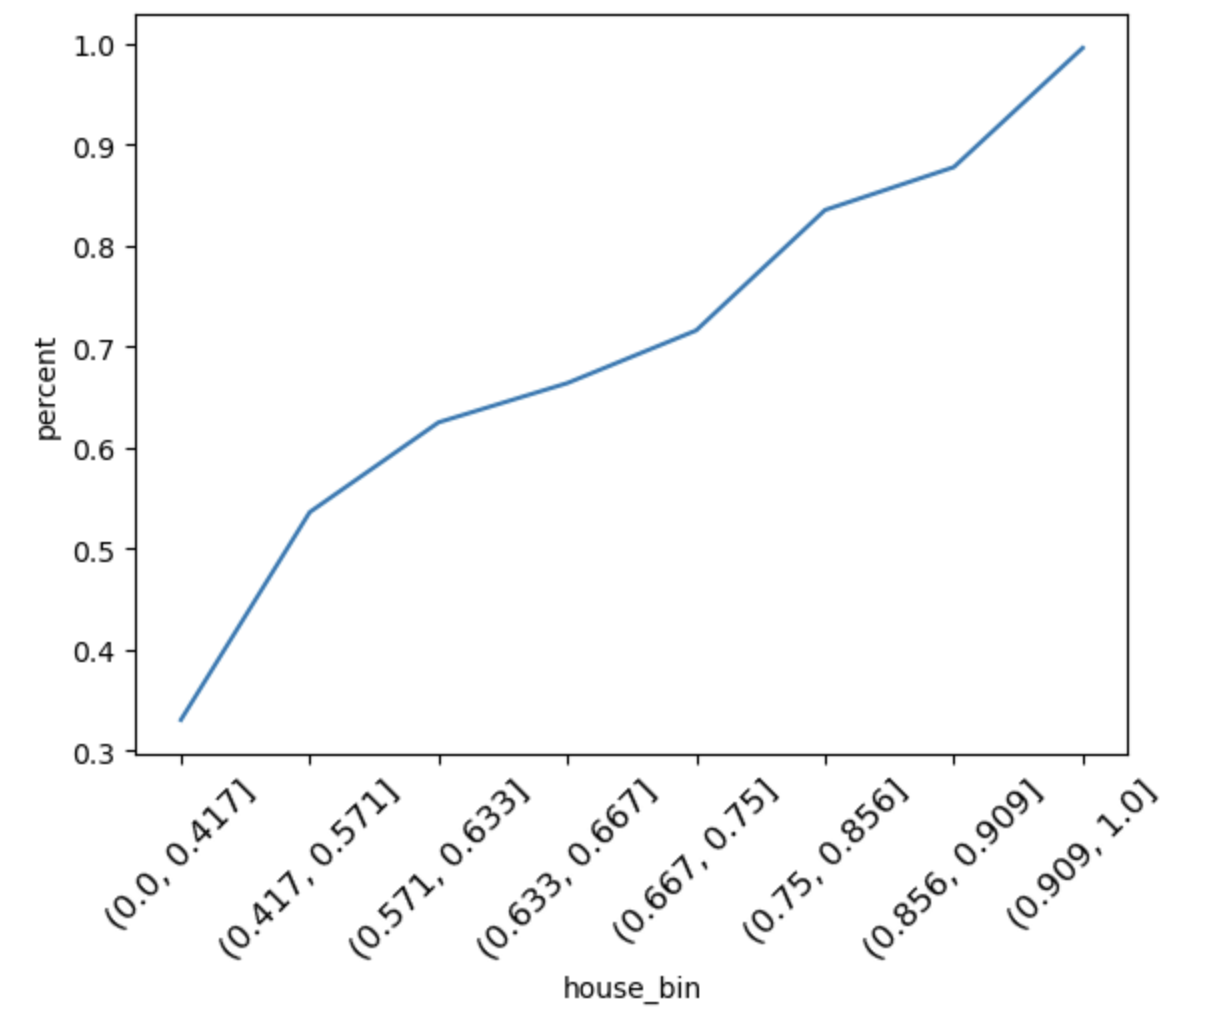

## Approach

We used a logistic regression model and optimized classification accuracy. We chose to optimize classification accuracy as a whole and not recall or precision because we were interested in correctly predicting the outcomes of as many characters as possible. At first, we approached the problem with a linear regression model because that was what we were familiar with from the course material. However, after the class covered logistic regression, we realized logistic modelling would be appropriate for predicting the binary measure isAlive.

Other people have addressed before the topic of GOT characters' survival, but the two models we saw were distinct from ours. The first one by students at Oberlin University predicted the chances of survive in upcoming books (http://allendowney.blogspot.com/2015/03/bayesian-survival-analysis-for-game-of.html. For the second one, it seems like the project also created a model to predict whether characters have already survived and died, but they calculated a percentage likelihood of survival instead of a binary result. With machine learning for their modeling, they obtained a final validation accuracy of 89.92%.

## Developing the model -- not answered maybe do this together thurs

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

We used forward model selection to select the best model for prediction. We chose this specifically because we had too many predictors for best subset selection to be feasible with time/processor constraints. Our algorithm for forward selection differed from the one covered in class slightly; where the one in class used pseudo-$R^2$ to select the best model, ours used calculated accuracy from leave-one-out cross validation. Overall, we were able to obtain a model accuracy of 82%.
We chose not to address multicollinearity, since our problem is primarily a prediction problem, and multicollinearity tends not to interfere with prediction. We found that variable transformations, apart from the binning of house and culture, were not necessary, as we didn't find any predictors that had a clear non-linear relationship with the data in our EDA. We made visualizations to address outliers/influential points, but ultimately decided not to develop a new model without them because outlying or unusual points accounted for a small percentage of the data, and removing them did not improve accuracy.

## Limitations of the model with regard to inference / prediction

The inferences made from our model will be affected as new GOT books are released. Character information is subject to change, and the data we used to train our model on will become outdated as character development continues and characters change. Specifically, predictors like isMarried or isNoble are subject to change for any still living character. As more data comes out and more characters are introduced, our model may become less useful than models trained on more updated data.
As more characters die, we may find that the predictors we used might not be as significant, or possibly not significant at all. Therefore, our model will hold until the sixth book is released. After that, we assume the model will still be significant, but potentially less so.

## Conclusions and Recommendations to stakeholder(s) -- not answered

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Our model will predict to a high degree of accuracy whether a character will survive or die in the series. For fans of the series, we recommend using our model to predict the outcomes of characters they are interested in. For example, if a fan is interested in whether a certain character will survive, they can input the character's information into our model and see the predicted outcome. This will not have the effect of spoiling the next book because our model isn't perfectly accurate and it doesn't predict the method of death. So this will be a fun way for fans to speculate about the future of the series and its characters. 

For the creators of the series, like George R. R. Martin, we recommend using our model to decide which characters to kill off, and which characters to keep alive. This will help them keep the series interesting and unpredictable, while also keeping the characters' fates realistic.

Because Game of Thrones kills off a lot of its characters, we recommend using a decision threshold that prioritizes precision over recall, so the percentage of people the model predicts will survive that actually survive is high.

Some limitations of our model are that it is only good for one-time use. As more books are released, the data will become outdated and the model will become less accurate. We can update the model with the data of the new books though Also, the model is only good for predicting whether a character will survive or die, not how they will die. This is because the model is a binary classifier, and it is not possible to predict the method of death with a binary classifier.

## GitHub and individual contribution {-} -- not answered need to fill out github section

**Github link** for the project repository.

https://github.com/cbugayer/RegressionObsession

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Divya Bhardwa</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Charles Bugayer</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions.</td>
    <td>120</td>
  </tr>
    <tr>
    <td>Cat Tawadros</td>
    <td>Cross validation/testing implementation, model selection algorithm development, outlier/decision threshold visualizations</td>
    <td>Developed main and helper functions for leave-one-out cross validation, employed cross validation for forward selection, executed forward selection for model choice, analyzed model accuracy and shortcomings.</td>
    <td>12</td>    
  </tr>
    <tr>
    <td>Annie Xia </td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

It proved to be quite useful in most scenarios, however was a bit difficult to navigate when dealing with merging conflicts. Because of this, we began working in separate files, which led to some disorganization in the early stages of the project.

## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.